In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import yfinance as yf
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# DataFrame de las 5 empresas
simbolos = ['AAPL', 'MSFT', 'TSLA', 'AMD', 'NVDA']
datos_por_simbolo = yf.download(simbolos, start="2020-01-01", end="2023-01-01", group_by='ticker')
datos_por_simbolo

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2020-01-02  151.289108  153.147108  150.860341  153.042297  22622100   
2020-01-03  150.850807  152.403898  150.603064  151.136642  21116200   
2020-01-06  149.669328  151.594033  149.126212  151.527328  20813700   
2020-01-07  151.803637  152.137116  149.897993  150.145721  21634100   
2020-01-08  151.432046  153.213833  150.498284  152.537323  27746500   
...                ...         ...         ...         ...       ...   
2022-12-23  231.408056  234.113087  229.281272  233.975876  21207000   
2022-12-27  233.946490  234.171905  231.133648  232.241150  16688600   
2022-12-28  232.172500  234.946144  229.506666  229.859497  17457100   
2022-12-29  230.957219  237.102361  230.957219  236.210480  19770700   
2022-12-30  233.466236  235.181386  231.947100  235.044174  21938500   

Ticker           NVDA                                              ...  \
Price            Open       High        Low      Close     Volume  ...   
Date                                                               ...   
2020-01-02   5.943285   5.972161   5.892752   5.972161  237536000  ...   
2020-01-03   5.852425   5.920384   5.827531   5.876571  205384000  ...   
2020-01-06   5.783222   5.906444   5.757084   5.901216  262636000  ...   
2020-01-07   5.929594   6.018463   5.884537   5.972659  314856000  ...   
2020-01-08   5.968427   6.025184   5.928349   5.983861  277108000  ...   
...               ...        ...        ...        ...        ...  ...   
2022-12-23  15.183560  15.326443  14.870816  15.193552  349326000  ...   
2022-12-27  15.061658  15.087636  14.044491  14.109438  464902000  ...   
2022-12-28  13.915598  14.250324  13.872633  14.024509  351066000  ...   
2022-12-29  14.390209  14.670978  14.215352  14.591043  354923000  ...   
2022-12-30  14.322263  14.617022  14.221346  14.602035  310490000  ...   

Ticker            AMD                                                   AAPL  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2020-01-02  46.860001  49.250000  46.630001  49.099998  80331100   71.627100   
2020-01-03  48.029999  49.389999  47.540001  48.599998  73127400   71.847118   
2020-01-06  48.020000  48.860001  47.860001  48.389999  47934900   71.034717   
2020-01-07  49.349998  49.389999  48.040001  48.250000  58061400   72.497514   
2020-01-08  47.849998  48.299999  47.139999  47.830002  53767000   71.849548   
...               ...        ...        ...        ...       ...         ...   
2022-12-23  63.110001  64.660004  62.720001  64.519997  45923000  129.245801   
2022-12-27  63.869999  64.279999  62.970001  63.270000  36086000  129.699914   
2022-12-28  62.540001  63.540001  61.959999  62.570000  39526500  128.011800   
2022-12-29  63.639999  65.180000  63.060001  64.820000  41428500  126.353252   
2022-12-30  63.770000  64.820000  63.139999  64.769997  37127000  126.767881   

Ticker                                                     
Price             High         Low       Close     Volume  
Date                                                       
2020-01-02   72.681296   71.373226   72.620850  135480400  
2020-01-03   72.676447   71.689957   71.914818  146322800  
2020-01-06   72.526541   70.783256   72.487854  118387200  
2020-01-07   72.753808   71.926900   72.146927  108872000  
2020-01-08   73.609760   71.849548   73.307526  132079200  
...                ...         ...         ...        ...  
2022-12-23  130.726619  127.982170  130.173782   63814900  
2022-12-27  129.729530  127.073927  128.367172   69007800  
2022-12-28  129.354409  124.260398  124.428223   85438400  
2022-12-29  128.811407  126.096582  127.952538   75703700  
2022-12-30  128.288181  125.800410  128.268433   7703

In [ ]:
# División para usar cadagrupo
empresas = {ticker: datos_por_simbolo[ticker].copy() for ticker in simbolos}
df_aapl = empresas['AAPL']
df_amd = empresas['AMD']
df_tsla = empresas['TSLA']
df_msft = empresas['MSFT']
df_nvda = empresas['NVDA']

In [4]:
df_aapl.dropna(inplace=True)

In [ ]:
# Entrenamieto del modelo y predicciones
X = df_aapl[['Open', 'High', 'Low', 'Volume']]
y = df_aapl['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predicciones = model.predict(X_test)


In [ ]:
# Evaluación de modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predicciones)

mse = mean_squared_error(y_test, predicciones)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, predicciones)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 0.73
MSE: 1.03
RMSE: 1.01
R²: 1.00


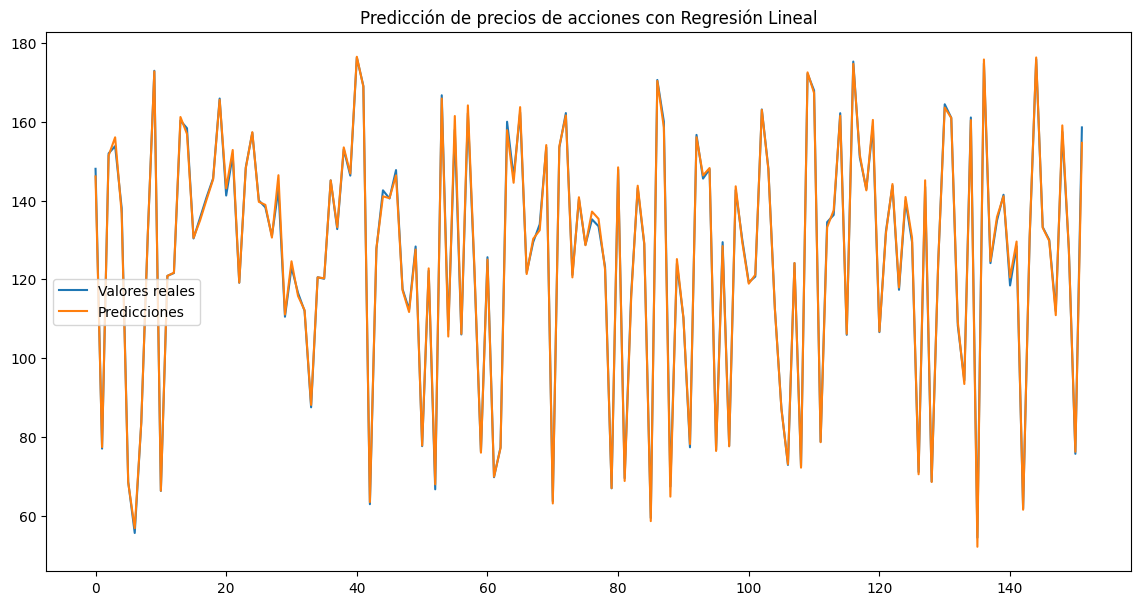

In [ ]:
# Grafico de predicciones comparadas con los datos reales
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Valores reales')
plt.plot(predicciones, label='Predicciones')
plt.legend()
plt.title('Predicción de precios de acciones con Regresión Lineal')
plt.show()

In [ ]:
# Datos para predecir, fondamentales para el resultado
df_aapl_new_data = yf.download("AAPL", start="2023-01-03", end="2023-01-04", interval='1d', group_by='ticker', multi_level_index=False)
df_aapl_new_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03,128.614001,129.226068,122.582134,123.470627,112117500


In [ ]:
# Datos empreados para la predicción
X_train_new_data = df_aapl_new_data[['Open', 'High', 'Low', 'Volume']]
prediccion = model.predict(X_train_new_data)
print(prediccion)

[124.29892828]


In [ ]:
# Diferencia entre dato real y predicho
print(prediccion - df_aapl_new_data['Close'])

Date
2023-01-03    0.828301
Name: Close, dtype: float64


In [ ]:
# Nuevos datos para volver a entrenar el modelo
df_aapl_new_data2 = yf.download("AAPL", start="2023-01-04", end="2025-05-23", group_by='ticker', multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Verificaciones por errores de 'Date' por no ser columna sino indice
print("Columnas de df_aapl:")
print(df_aapl.columns.tolist())
print("\nColumnas de df_aapl_new_data:")
print(df_aapl_new_data.columns.tolist())
print("\nColumnas de df_aapl_new_data2:")
print(df_aapl_new_data2.columns.tolist())

Columnas de df_aapl:
['Open', 'High', 'Low', 'Close', 'Volume']

Columnas de df_aapl_new_data:
['Open', 'High', 'Low', 'Close', 'Volume']

Columnas de df_aapl_new_data2:
['Open', 'High', 'Low', 'Close', 'Volume']


In [15]:
print("Índice de df_aapl:")
print(df_aapl.index.name)
print("\nÍndice de df_aapl_new_data:")
print(df_aapl_new_data.index.name)
print("\nÍndice de df_aapl_new_data2:")
print(df_aapl_new_data2.index.name)

Índice de df_aapl:
Date

Índice de df_aapl_new_data:
Date

Índice de df_aapl_new_data2:
Date


In [ ]:
# Transformacion de 'Date' a columna y transformación a tiempo
for df in [df_aapl, df_aapl_new_data, df_aapl_new_data2]:
    if df.index.name == 'Date':
        df.reset_index(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#Verificación final
print("Verificación final:")
for i, df in enumerate([df_aapl, df_aapl_new_data, df_aapl_new_data2]):
    print(f"DataFrame {i+1} columnas: {df.columns.tolist()}")
    print(f"DataFrame {i+1} shape: {df.shape}")

Verificación final:
DataFrame 1 columnas: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
DataFrame 1 shape: (756, 6)
DataFrame 2 columnas: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
DataFrame 2 shape: (1, 6)
DataFrame 3 columnas: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
DataFrame 3 shape: (598, 6)


In [ ]:
# union de los dfs
datos_completos = pd.concat([df_aapl, df_aapl_new_data, df_aapl_new_data2], 
                       axis=0, 
                       ignore_index=True)

datos_completos.drop_duplicates(subset='Date', keep='last', inplace=True)
datos_completos.sort_values('Date', inplace=True)
datos_completos.reset_index(drop=True, inplace=True)

In [23]:
# Re entreno y predicción del 26 de mayo
X_total = datos_completos[['Open', 'High', 'Low', 'Volume']]
y_total = datos_completos['Close']


model.fit(X_total, y_total)
last_data = datos_completos.iloc[-1:][['Open', 'High', 'Low', 'Volume']]
prediccion_26_mayo = model.predict(last_data)
print(f"Predicción para el 26 de mayo: {prediccion_26_mayo[0]:.2f}")
score = model.score(X_total, y_total)
print(f"R² del modelo reentrenado: {score:.4f}")

Predicción para el 26 de mayo: 201.63
R² del modelo reentrenado: 0.9995
